In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [3]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [5]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [9]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [10]:
# 7. MLP + Dropout + AdamOptimizer

# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(128, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [11]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))


Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 5s 54us/step - loss: 0.9934 - accuracy: 0.6755 - val_loss: 0.4419 - val_accuracy: 0.9063
Epoch 2/500
87554/87554 [==============================] - 2s 28us/step - loss: 0.3917 - accuracy: 0.8953 - val_loss: 0.2497 - val_accuracy: 0.9301
Epoch 3/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.3118 - accuracy: 0.9129 - val_loss: 0.2203 - val_accuracy: 0.9390
Epoch 4/500
87554/87554 [==============================] - 3s 30us/step - loss: 0.2862 - accuracy: 0.9173 - val_loss: 0.2050 - val_accuracy: 0.9406
Epoch 5/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.2623 - accuracy: 0.9247 - val_loss: 0.1911 - val_accuracy: 0.9451
Epoch 6/500
87554/87554 [==============================] - 3s 32us/step - loss: 0.2497 - accuracy: 0.9279 - val_loss: 0.1831 - val_accuracy: 0.9463
Epoch 7/500
87554/87554 [==============================] - 3s

87554/87554 [==============================] - 4s 51us/step - loss: 0.1349 - accuracy: 0.9618 - val_loss: 0.1054 - val_accuracy: 0.9717
Epoch 55/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.1349 - accuracy: 0.9621 - val_loss: 0.1048 - val_accuracy: 0.9714
Epoch 56/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.1321 - accuracy: 0.9632 - val_loss: 0.1049 - val_accuracy: 0.9716
Epoch 57/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.1423 - accuracy: 0.9609 - val_loss: 0.1060 - val_accuracy: 0.9720
Epoch 58/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.1388 - accuracy: 0.9610 - val_loss: 0.1058 - val_accuracy: 0.9713
Epoch 59/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.1406 - accuracy: 0.9603 - val_loss: 0.1051 - val_accuracy: 0.9718
Epoch 60/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.1327 - accuracy: 0.9628 - val_loss: 

Epoch 109/500
87554/87554 [==============================] - 5s 59us/step - loss: 0.1052 - accuracy: 0.9703 - val_loss: 0.0910 - val_accuracy: 0.9748
Epoch 110/500
87554/87554 [==============================] - 5s 57us/step - loss: 0.1069 - accuracy: 0.9703 - val_loss: 0.0897 - val_accuracy: 0.9752
Epoch 111/500
87554/87554 [==============================] - 5s 54us/step - loss: 0.1045 - accuracy: 0.9699 - val_loss: 0.0889 - val_accuracy: 0.9756
Epoch 112/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.1069 - accuracy: 0.9702 - val_loss: 0.0903 - val_accuracy: 0.9752
Epoch 113/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.1067 - accuracy: 0.9701 - val_loss: 0.0912 - val_accuracy: 0.9745
Epoch 114/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.1080 - accuracy: 0.9697 - val_loss: 0.0899 - val_accuracy: 0.9752
Epoch 115/500
87554/87554 [==============================] - 4s 49us/step - loss: 0.1084 - accuracy:

87554/87554 [==============================] - 4s 49us/step - loss: 0.0964 - accuracy: 0.9723 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 164/500
87554/87554 [==============================] - 4s 48us/step - loss: 0.0943 - accuracy: 0.9730 - val_loss: 0.0834 - val_accuracy: 0.9766
Epoch 165/500
87554/87554 [==============================] - 4s 50us/step - loss: 0.0930 - accuracy: 0.9736 - val_loss: 0.0839 - val_accuracy: 0.9766
Epoch 166/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0931 - accuracy: 0.9738 - val_loss: 0.0840 - val_accuracy: 0.9766
Epoch 167/500
87554/87554 [==============================] - 4s 46us/step - loss: 0.0902 - accuracy: 0.9739 - val_loss: 0.0826 - val_accuracy: 0.9771
Epoch 168/500
87554/87554 [==============================] - 5s 52us/step - loss: 0.0903 - accuracy: 0.9741 - val_loss: 0.0823 - val_accuracy: 0.9772
Epoch 169/500
87554/87554 [==============================] - 5s 59us/step - loss: 0.0918 - accuracy: 0.9744 - val_

Epoch 218/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0825 - accuracy: 0.9764 - val_loss: 0.0772 - val_accuracy: 0.9787
Epoch 219/500
87554/87554 [==============================] - 4s 46us/step - loss: 0.0817 - accuracy: 0.9764 - val_loss: 0.0784 - val_accuracy: 0.9785
Epoch 220/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0811 - accuracy: 0.9766 - val_loss: 0.0773 - val_accuracy: 0.9786
Epoch 221/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0823 - accuracy: 0.9760 - val_loss: 0.0792 - val_accuracy: 0.9784
Epoch 222/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0829 - accuracy: 0.9762 - val_loss: 0.0788 - val_accuracy: 0.9779
Epoch 223/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0823 - accuracy: 0.9767 - val_loss: 0.0778 - val_accuracy: 0.9787
Epoch 224/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0826 - accuracy:

87554/87554 [==============================] - 4s 50us/step - loss: 0.0762 - accuracy: 0.9775 - val_loss: 0.0747 - val_accuracy: 0.9792
Epoch 273/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0755 - accuracy: 0.9781 - val_loss: 0.0749 - val_accuracy: 0.9790
Epoch 274/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0749 - accuracy: 0.9782 - val_loss: 0.0747 - val_accuracy: 0.9793
Epoch 275/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0743 - accuracy: 0.9783 - val_loss: 0.0747 - val_accuracy: 0.9795
Epoch 276/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0750 - accuracy: 0.9780 - val_loss: 0.0750 - val_accuracy: 0.9792
Epoch 277/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0762 - accuracy: 0.9777 - val_loss: 0.0739 - val_accuracy: 0.9798
Epoch 278/500
87554/87554 [==============================] - 4s 49us/step - loss: 0.0737 - accuracy: 0.9786 - val_

87554/87554 [==============================] - 4s 48us/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0732 - val_accuracy: 0.9797
Epoch 327/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.0742 - val_accuracy: 0.9797
Epoch 328/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0719 - accuracy: 0.9789 - val_loss: 0.0719 - val_accuracy: 0.9799
Epoch 329/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.0735 - val_accuracy: 0.9796
Epoch 330/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0704 - accuracy: 0.9790 - val_loss: 0.0736 - val_accuracy: 0.9799
Epoch 331/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0696 - accuracy: 0.9792 - val_loss: 0.0733 - val_accuracy: 0.9800
Epoch 332/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0696 - accuracy: 0.9793 - val_

87554/87554 [==============================] - 4s 45us/step - loss: 0.0672 - accuracy: 0.9798 - val_loss: 0.0716 - val_accuracy: 0.9815
Epoch 381/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0653 - accuracy: 0.9808 - val_loss: 0.0732 - val_accuracy: 0.9806
Epoch 382/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0711 - val_accuracy: 0.9810
Epoch 383/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.0715 - val_accuracy: 0.9809
Epoch 384/500
87554/87554 [==============================] - 4s 45us/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0708 - val_accuracy: 0.9805
Epoch 385/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.0705 - val_accuracy: 0.9811
Epoch 386/500
87554/87554 [==============================] - 3s 33us/step - loss: 0.0650 - accuracy: 0.9806 - val_

Epoch 435/500
87554/87554 [==============================] - 3s 32us/step - loss: 0.0633 - accuracy: 0.9810 - val_loss: 0.0708 - val_accuracy: 0.9813
Epoch 436/500
87554/87554 [==============================] - 3s 33us/step - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0695 - val_accuracy: 0.9818
Epoch 437/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0715 - val_accuracy: 0.9808
Epoch 438/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0715 - val_accuracy: 0.9814
Epoch 439/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0668 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9805
Epoch 440/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0701 - val_accuracy: 0.9811
Epoch 441/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0648 - accuracy:

87554/87554 [==============================] - 3s 31us/step - loss: 0.0603 - accuracy: 0.9815 - val_loss: 0.0710 - val_accuracy: 0.9814
Epoch 490/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 491/500
87554/87554 [==============================] - 3s 29us/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.0699 - val_accuracy: 0.9816
Epoch 492/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0705 - val_accuracy: 0.9813
Epoch 493/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.0719 - val_accuracy: 0.9810
Epoch 494/500
87554/87554 [==============================] - 3s 33us/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0694 - val_accuracy: 0.9815
Epoch 495/500
87554/87554 [==============================] - 3s 29us/step - loss: 0.0598 - accuracy: 0.9824 - val_

In [12]:
y_pred = model_drop.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.94      0.68      0.79       556
           2       0.96      0.94      0.95      1448
           3       0.86      0.73      0.79       162
           4       0.99      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.95      0.87      0.90     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.07144708678216694
Test accuracy: 0.9815000891685486


<IPython.core.display.Javascript object>


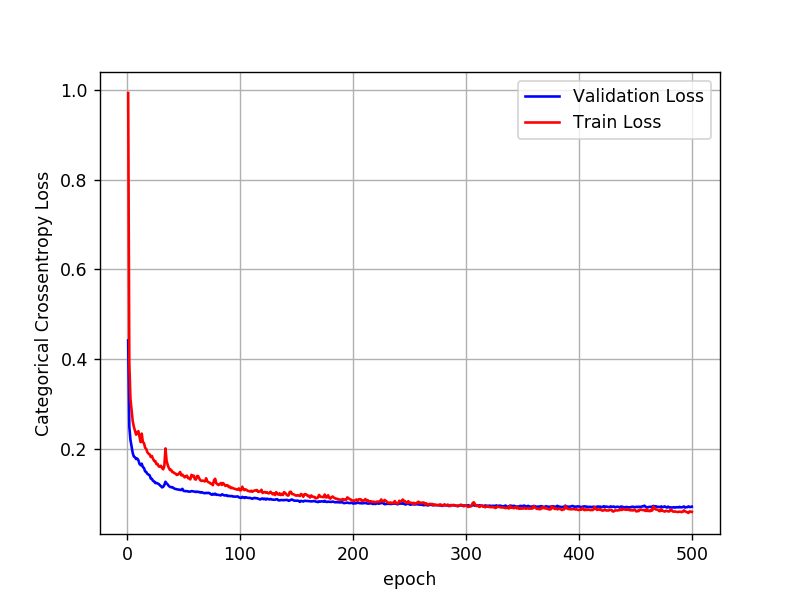

In [13]:
score = model_drop.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [16]:
 #             precision    recall  f1-score   support

 #          0       0.98      1.00      0.99     18118
 #          1       0.94      0.68      0.79       556
 #          2       0.96      0.94      0.95      1448
 #         3       0.86      0.73      0.79       162
 #          4       0.99      0.98      0.98      1608

#    accuracy                           0.98     21892
#   macro avg       0.95      0.87      0.90     21892
# weighted avg       0.98      0.98      0.98     21892

#Test score: 0.07144708678216694
#Test accuracy: 0.9815000891685486